# Generating polynomial coeffiencts to analyse

In [3]:
import pandas
import pprint

In [1]:
def increasing_degree(n,p):
    l  = []
    for i in range(3,n):
        b = 100+int(i/p**(1/float(i)))*100
        newcoeffs = [1]
        for j in range(1,i):
            newcoeffs = [0]+newcoeffs
        newcoeffs = [-p]+newcoeffs
        l.append([b,newcoeffs])
    return l

def increasing_height(h, d):
    l  = []
    for i in range(3,h):
        b = 100+int(d/i**(1/float(d)))*100
        newcoeffs = [1]
        for j in range(1,d):
            newcoeffs = [0]+newcoeffs
        newcoeffs = [-i]+newcoeffs
        l.append([b,newcoeffs])
    return l

def increasing_both(n):
    l = []
    for i in range(3, n):
        b = 100+int(i/i**(1/float(i)))*100
        newcoeffs = [1]
        for j in range(1, i):
            newcoeffs = [0]+newcoeffs
        newcoeffs = [-i]+newcoeffs
        l.append([b,newcoeffs])
    return l

def export_to_csv(l, filename):
    f = open(filename, 'w')
    for el in l:
        b = el[0]
        cs = el[1]
        f.write(str(b)+" ")
        s= ""
        for e in cs:
            s += str(e) + ","
        f.write(s[:-1]+"\n")
    f.close()

In [6]:
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(increasing_both(10))
pp.pprint(increasing_degree(10, 2))
pp.pprint(increasing_height(20,3))

[ [300, [-3, 0, 0, 1]],
  [300, [-4, 0, 0, 0, 1]],
  [400, [-5, 0, 0, 0, 0, 1]],
  [500, [-6, 0, 0, 0, 0, 0, 1]],
  [600, [-7, 0, 0, 0, 0, 0, 0, 1]],
  [700, [-8, 0, 0, 0, 0, 0, 0, 0, 1]],
  [800, [-9, 0, 0, 0, 0, 0, 0, 0, 0, 1]]]
[ [300, [-2, 0, 0, 1]],
  [400, [-2, 0, 0, 0, 1]],
  [500, [-2, 0, 0, 0, 0, 1]],
  [600, [-2, 0, 0, 0, 0, 0, 1]],
  [700, [-2, 0, 0, 0, 0, 0, 0, 1]],
  [800, [-2, 0, 0, 0, 0, 0, 0, 0, 1]],
  [900, [-2, 0, 0, 0, 0, 0, 0, 0, 0, 1]]]
[ [300, [-3, 0, 0, 1]],
  [200, [-4, 0, 0, 1]],
  [200, [-5, 0, 0, 1]],
  [200, [-6, 0, 0, 1]],
  [200, [-7, 0, 0, 1]],
  [200, [-8, 0, 0, 1]],
  [200, [-9, 0, 0, 1]],
  [200, [-10, 0, 0, 1]],
  [200, [-11, 0, 0, 1]],
  [200, [-12, 0, 0, 1]],
  [200, [-13, 0, 0, 1]],
  [200, [-14, 0, 0, 1]],
  [200, [-15, 0, 0, 1]],
  [200, [-16, 0, 0, 1]],
  [200, [-17, 0, 0, 1]],
  [200, [-18, 0, 0, 1]],
  [200, [-19, 0, 0, 1]]]


In [14]:
import os
os.chdir('/usr/userfs/s/sjb577/workspace/Continued Fractions of Algebraics/jobs/multi')

In [15]:
export_to_csv([[50, [-2, 0,0,1]]], 'test.csv')

In [17]:
many = 50
export_to_csv(increasing_height(many, 3), 'increasing_height_'+str(many)+'_3.csv')
export_to_csv(increasing_degree(many, 2), 'increasing_degree_'+str(many)+'_2.csv')
export_to_csv(increasing_both(many), 'increasing_both_'+str(many)+'.csv')

# Analysing the results

## Example of fourth root of 52

In [4]:
%pylab inline
from collections import Counter,deque
import heapq
import sympy,re
from sympy.abc import x
from pprint import pprint
import os,glob, operator
import time
import progressbar
from progressbar import Counter, Timer, ProgressBar, Attribute
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


In [5]:
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

In [6]:

def import_cf(filename, directory):
    os.chdir(directory)
    f = open(filename,'r')
    key = f.readline()
    data = numpy.loadtxt(filename, delimiter=',', skiprows=1, dtype=int)
    f.close()
    return key, data

def sympy_poly(p):
    p =re.sub("[^0-9\-]", ",",p).split(",")
    coeffs = [int(c) for c in p if c!='']
    counter = 0
    y = sympy.poly(0,x)
    for c in coeffs:
        y += sympy.poly(c*x**counter, x)
        counter +=1
    return y

def latex_poly(p):
    return sympy.latex(p.as_expr(), mode='inline')

def disc_poly(p):
    return sympy.discriminant(p)


def plot_stuff(data, legend):
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    pyplot.rc('text', usetex=True)
    pyplot.rc('font', family='serif')
    ax.plot(data, label=legend)
    pyplot.legend(loc='upper right');
    return fig, ax

def maxes(data):
    maxes=[]
    prevMax=0
    for c in ans:
        prevMax = max(c, prevMax)
        maxes.append(prevMax)
    return maxes
        
def running_maxes(ans, var):
    return numpy.convolve(ans, np.ones((var, ))/var, mode='valid')

In [ ]:
direc = "/shared/storage/maths/research/numbertheory/sjb577/cf/"
filename = "test_multi.job.o966562"
key, data = import_cf(filename, direc)
p = sympy_poly(key)
l = latex_poly(p)
d = disc_poly(p)
ans = numpy.array([x[0] for x in data])
ynbits = numpy.array([x[1] for x in data])
prodbits = numpy.array([x[2] for x in data])

In [23]:
khint_constant = 2**(float(prodbits[-1])/len(prodbits))
levy_constant = 2**(float(ynbits[-1])/len(ynbits))

runnmaxes = running_maxes(ans, 1000)
maxs = maxes(ans)


-35995648

In [13]:
counts.most_common(10)

AttributeError: 'Counter' object has no attribute 'most_common'

In [30]:
data[-1][1]

1711550

In [25]:
2**(1424812.0/1000000)

2.6847951226282167

In [37]:
ld = numpy.array([x[2] for x in data])

(<matplotlib.figure.Figure at 0x7fbb39f887d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbb2f29aed0>)

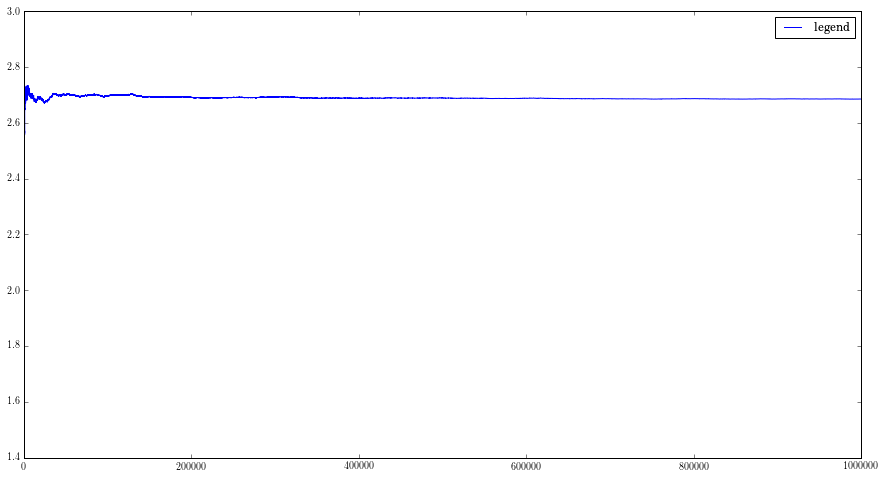

In [44]:
plot_stuff(numpy.array([2**(float(ld[n])/n) for n in xrange(1, len(ld))]), "legend")